In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

In [36]:
X, _ = make_blobs(1000, centers=5, random_state=42)

In [37]:
class KMeans:
    
    def __init__(self, n_clusters, max_iter=10):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        center_points = random.choices(X, k=self.n_clusters)
        self.clusters = []
        for point in center_points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
        
        for i in range(self.max_iter):
            self.labels_ = []
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                min_index = np.argmin(distances_np[:, 0])
                
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
        
            for cluster in self.clusters:
                cluster.update_center()
        
        
        
class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
    
    def distance(self, point):
        return np.sum((self.center - point) ** 2)

In [48]:
model = KMeans(5)

In [49]:
model.fit(X)

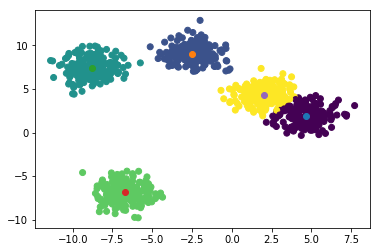

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
for cluster in model.clusters:
    plt.scatter(cluster.center[0], cluster.center[1] )